### About Dataset

I'll use **New York Airbnb Open Data dataset**.

Airbnb is an American company operating an _online marketplace_ for short and long-term _homestays_ and experiences. The company was founded in 2008 and since then guests and hosts have used it to travel in a more unique, personalized way. 

### Content

This dataset contains following Airbnb activity:
   - **Listings**, including full descriptions and average review score 
   - **Reviews**, including unique id for each reviewer and detailed comments
   - **Calendar**, including listing id and the price and availability for that day

### Take a look to a dataset

In [1]:
import pandas as pd

airbnb_data = pd.read_csv("/Users/vladimirbogatyrev/Airbnb_Open_Data.csv")

print(airbnb_data.shape)

airbnb_data.head()

(102599, 26)


/var/folders/c5/3gnfl2456z71045s4cr7f1cr0000gn/T/ipykernel_75833/2656548495.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv("/Users/vladimirbogatyrev/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [2]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Missing values
As we can see there is some missing values in our dataset. Let's take a closer look to this problem by finding out percentage of missing values in each column.

In [3]:
!pip install missingno

<AxesSubplot:>

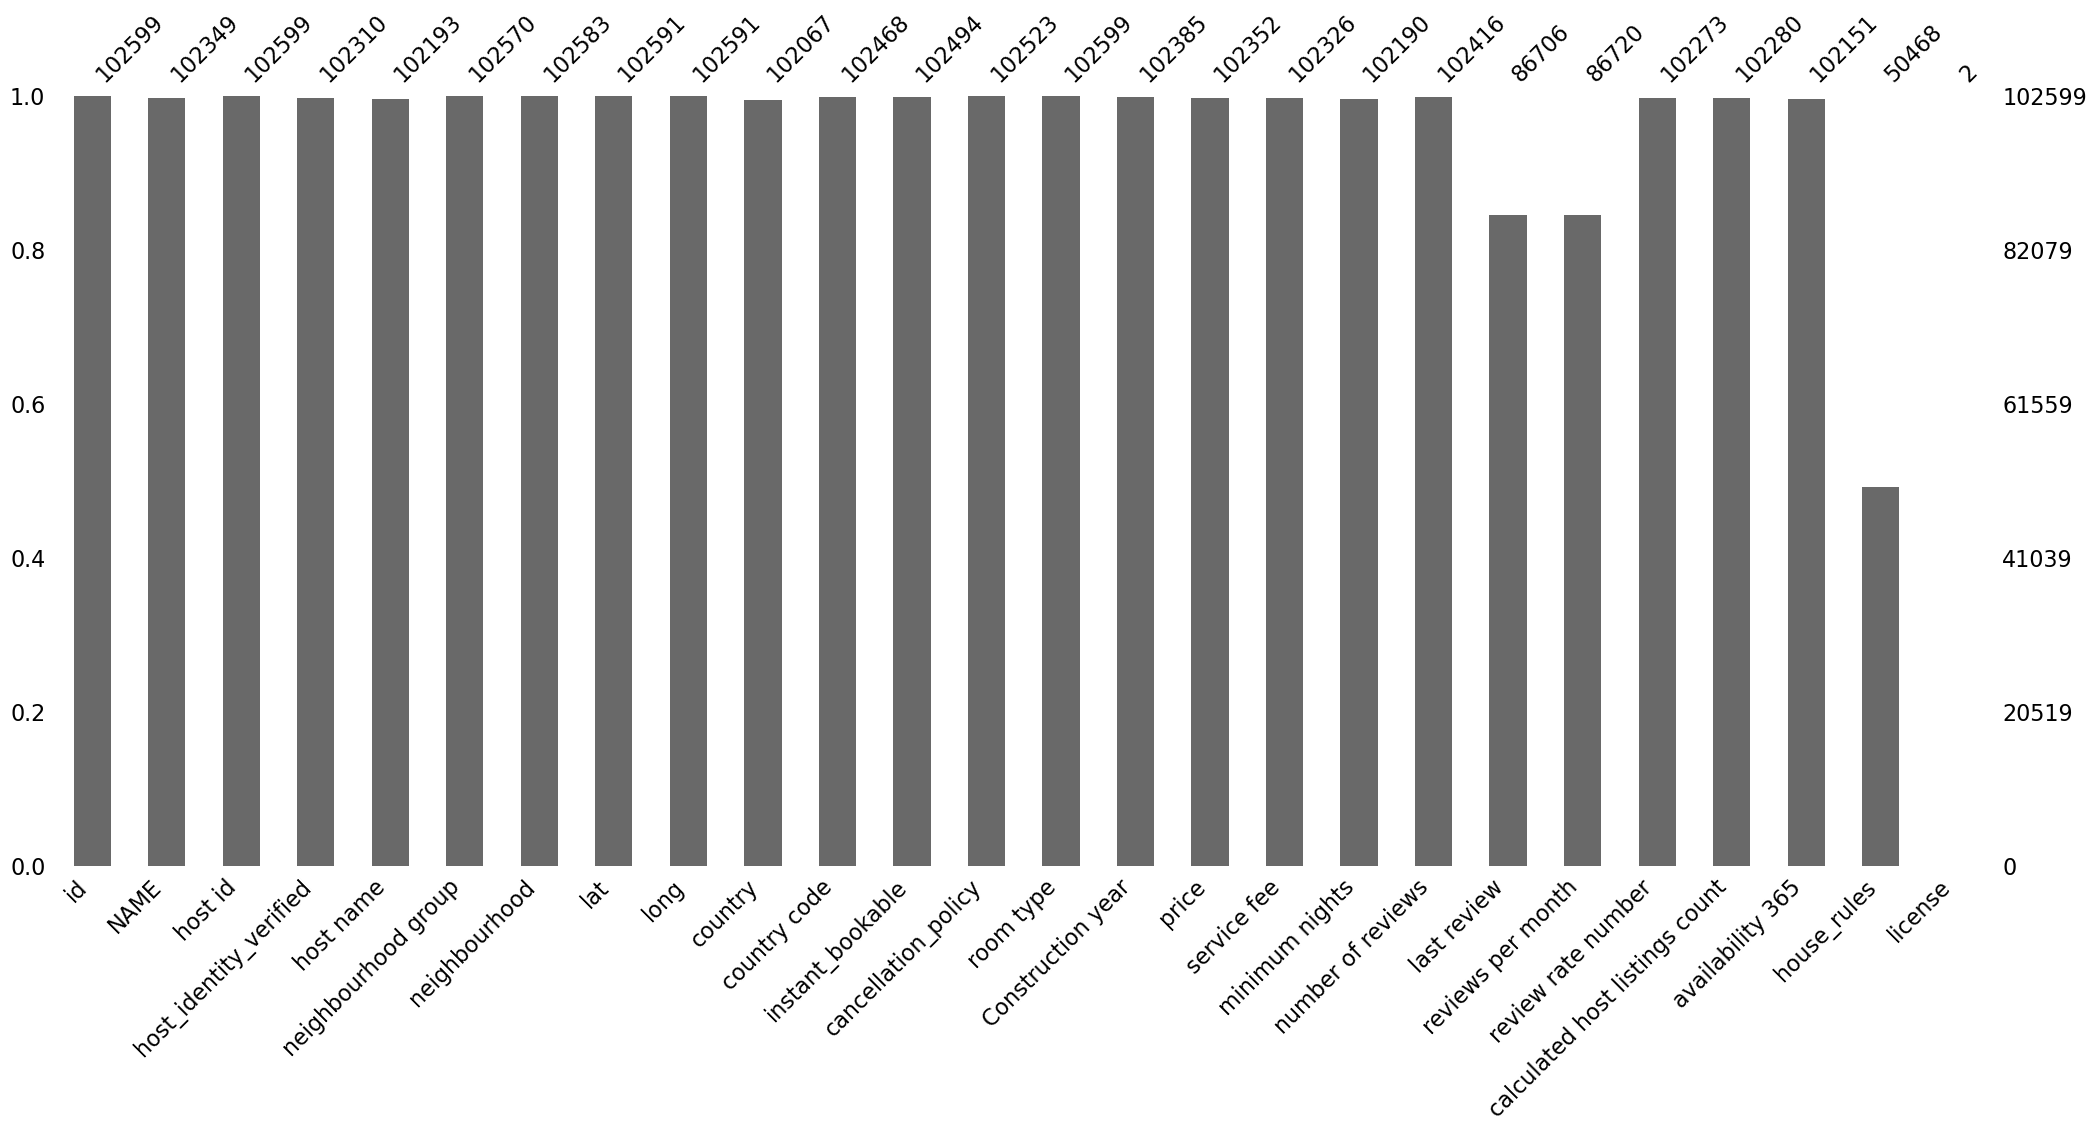

In [4]:
#Library to work with missing values
import missingno
import numpy as np

missingno.bar(airbnb_data)

<AxesSubplot:>

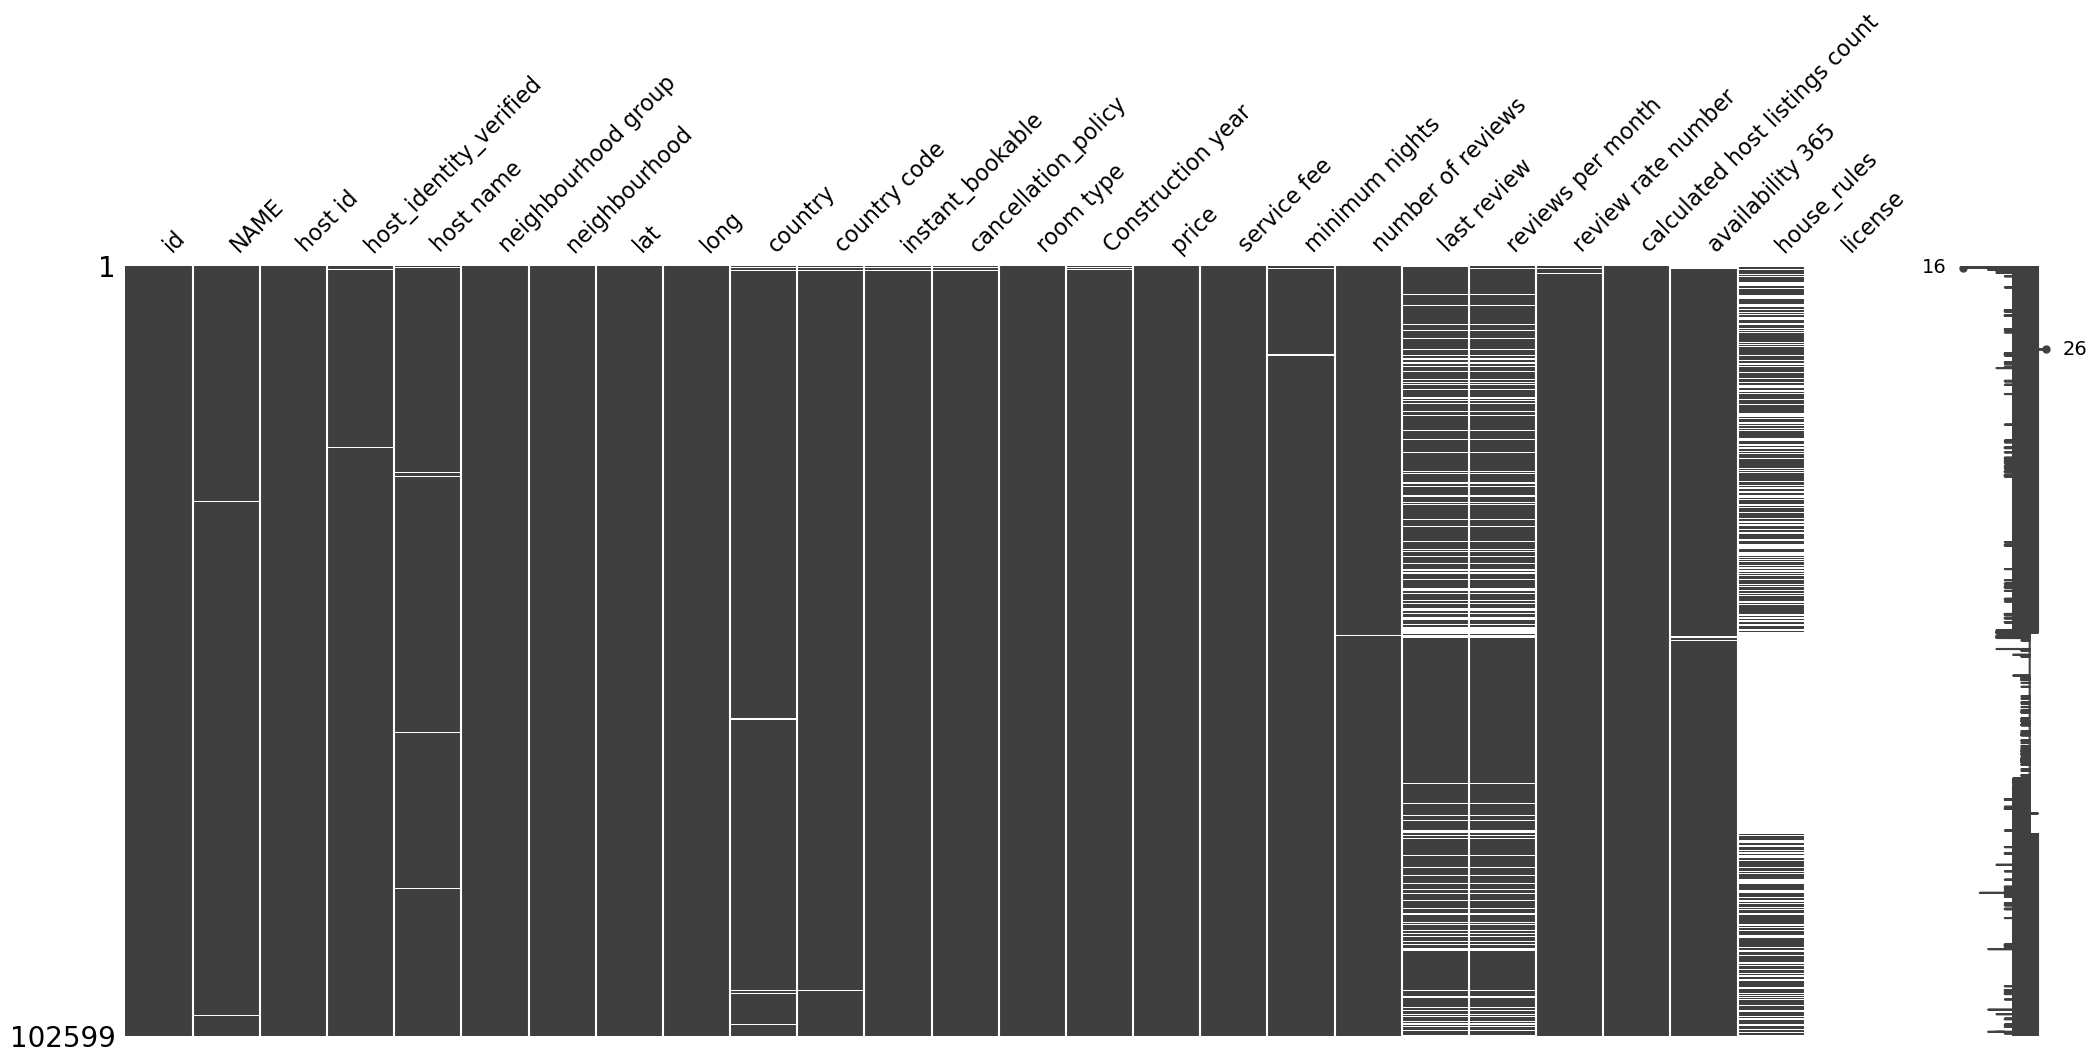

In [5]:
missingno.matrix(airbnb_data)

Diagram shows that there is much missing values in "last_review", "reviews per month", "house_rules" columns.

In [6]:
airbnb_data[["last review", "reviews per month", "house_rules", "license"]]

,last review,reviews per month,house_rules,license
0,10/19/2021,0.21,Clean up and treat the home the way you'd like...,NaN
1,5/21/2022,0.38,Pet friendly but please confirm with me if the...,NaN
2,NaN,NaN,"I encourage you to use my kitchen, cooking and...",NaN
3,7/5/2019,4.64,NaN,NaN
4,11/19/2018,0.10,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...
102594,NaN,NaN,No Smoking No Parties or Events of any kind Pl...,NaN
102595,7/6/2015,0.02,House rules: Guests agree to the following ter...,NaN
102596,NaN,NaN,NaN,NaN
102597,10/11/2015,0.10,NaN,NaN


**Why do this columns contains missing values?**
- If "last review" value is missing, it is missing cause there is no reviews at all or it wasnt recorded due the error. There is nothing i could do with this column except drop in case i wont use it for analysis.
- "reviews per month" value might be missing cause there was no reviews at all (value is 0.0). I'll replace al NaN values to 0.0.
- If "house_rules" value is missing, it is missing cause it doesn't exist or it wasnt recorded due the error. There is nothing i could do with this column except drop in case i wont use it for analysis.
- If "license" value is missing, it is missing cause it doesn't exist or it wasnt recorded due the error. There is nothing i could do with this column except drop in case i wont use it for analysis.

<AxesSubplot:>

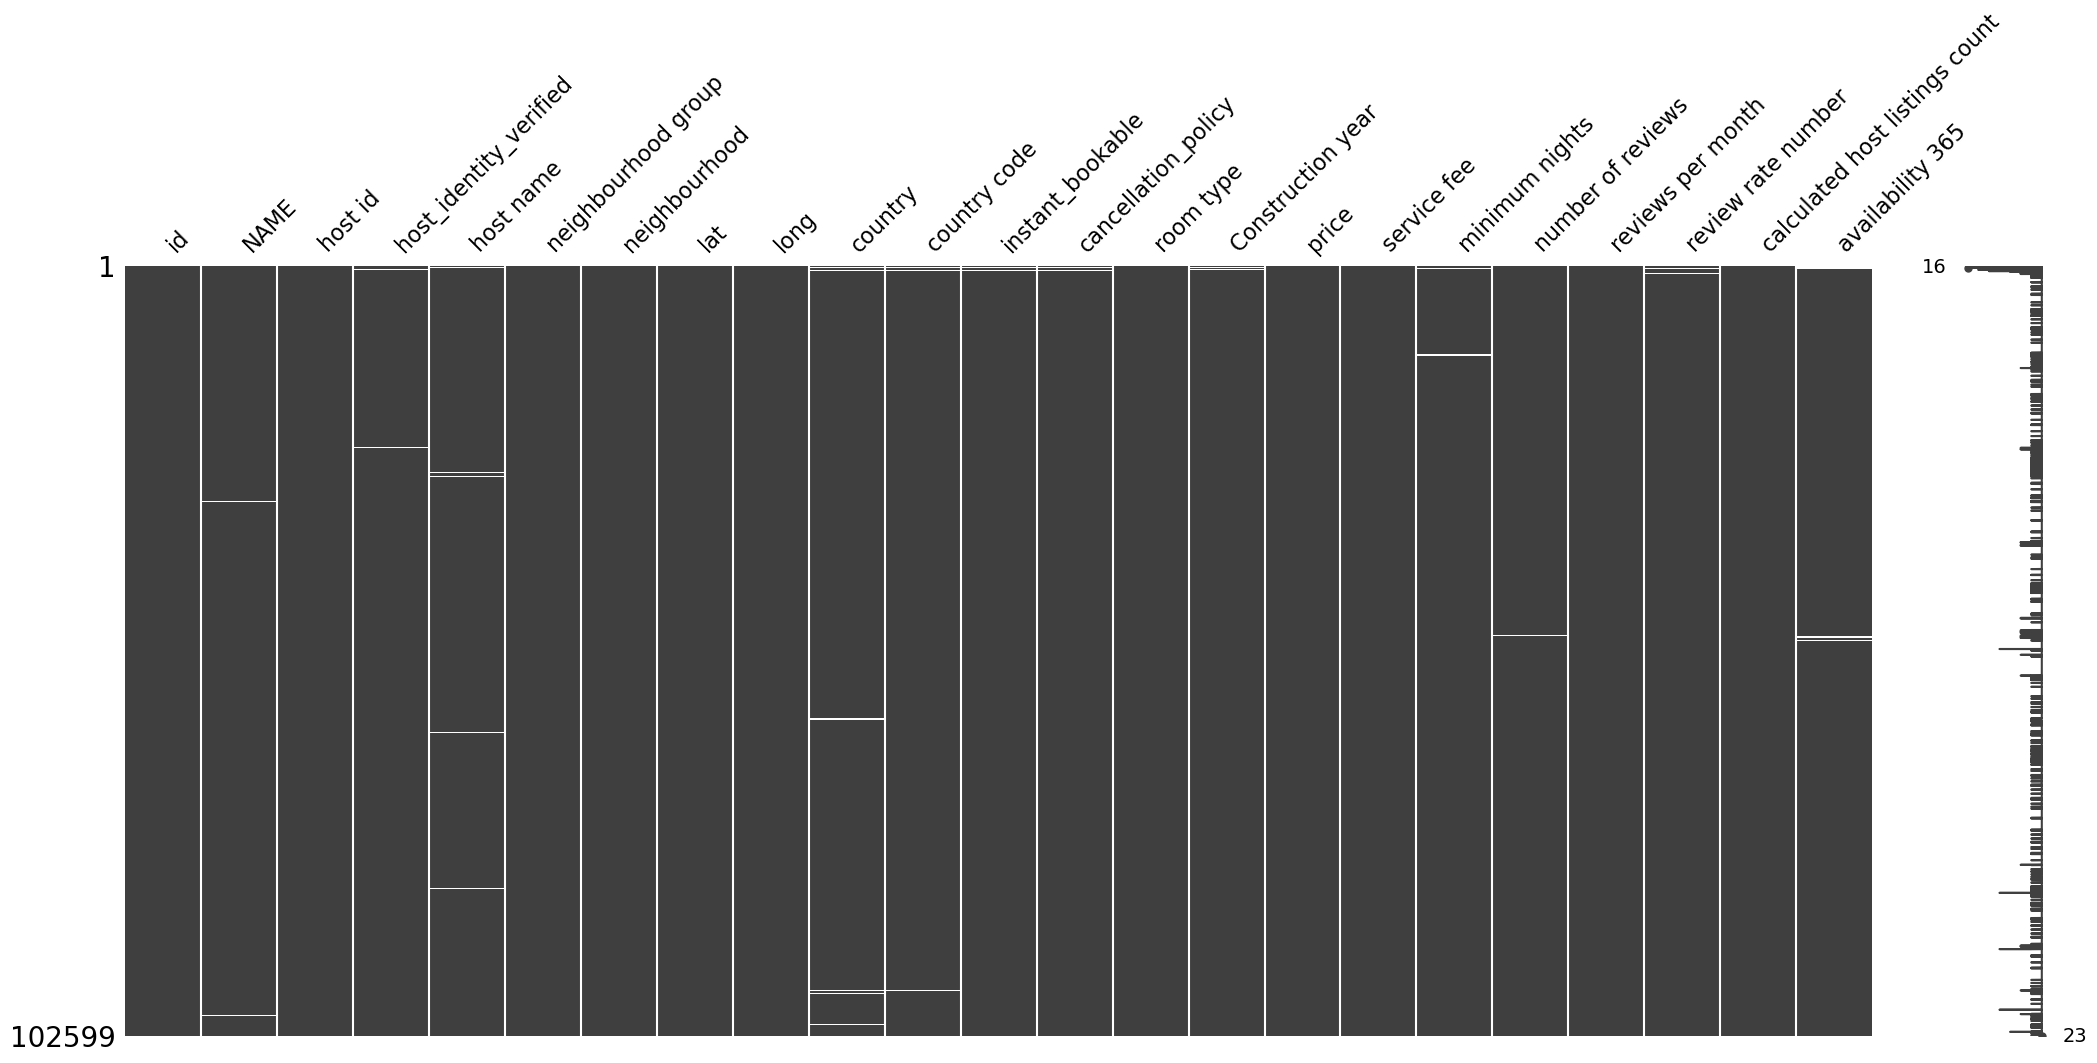

In [7]:
#replace all missing values to 0.0
airbnb_data["reviews per month"].fillna(0.0, inplace = True)

#drop "last review" and "house_rules" columns
airbnb_data.drop(["last review", "house_rules", "license"], axis = 1, inplace = True)

#make sure all is done
missingno.matrix(airbnb_data)

Data looks much cleaner now.

## Data conversataion

In [8]:
airbnb_data[["price", "service fee"]].info()
airbnb_data[["price", "service fee"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        102352 non-null  object
 1   service fee  102326 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


,price,service fee
0,$966,$193
1,$142,$28
2,$620,$124
3,$368,$74
4,$204,$41
...,...,...
102594,$844,$169
102595,$837,$167
102596,$988,$198
102597,$546,$109


Price and service fee columns contain currency information, therefore it's better to convert them into "int" type.

In [9]:
def clean_and_convert_price(value):
    try:
        value = value.replace('$', '').replace(',', '').replace(' ', '').replace('.', '').strip()
        return int(value)
    except:
        return None
    

airbnb_data['price'] = airbnb_data['price'].apply(clean_and_convert_price)
airbnb_data['service fee'] = airbnb_data['service fee'].apply(clean_and_convert_price)

airbnb_data[["price", "service fee"]]

,price,service fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0
...,...,...
102594,844.0,169.0
102595,837.0,167.0
102596,988.0,198.0
102597,546.0,109.0


After that let's drop the rows which contain negative values from columns with numerical data. Where it does make sense of course.

In [10]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

<AxesSubplot:>

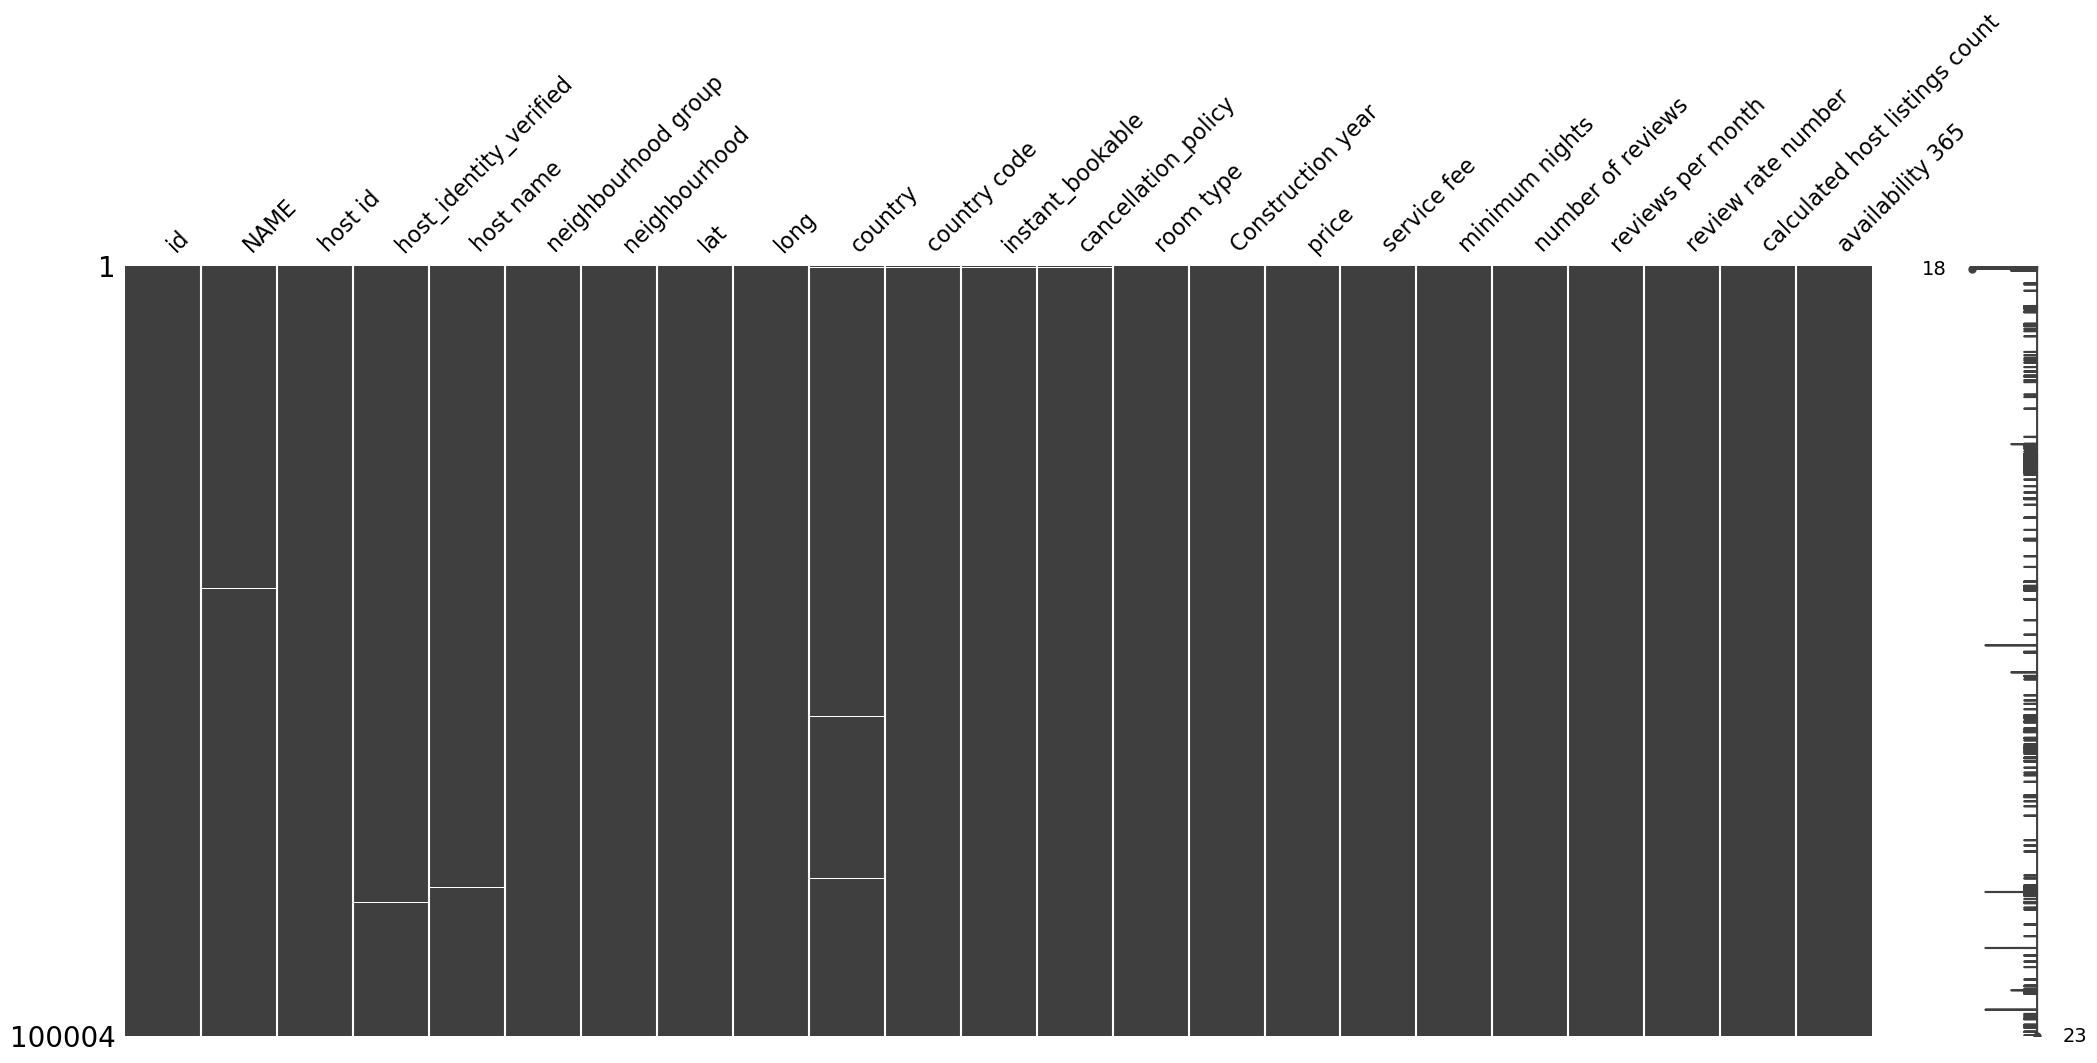

In [11]:
airbnb_data = airbnb_data[(airbnb_data["Construction year"] >= 0) & (airbnb_data["price"] >= 0) & (airbnb_data["service fee"] >= 0) & (airbnb_data["minimum nights"] >= 0) & (airbnb_data["number of reviews"] >= 0) & (airbnb_data["reviews per month"] >= 0) & (airbnb_data["review rate number"] >= 0) & (airbnb_data["calculated host listings count"] >= 0) & (airbnb_data["availability 365"] >= 0)]

missingno.matrix(airbnb_data)

Now all the important columns look extremely clean. Data pre-processing is done.